<a href="https://colab.research.google.com/github/David-S-Botero/MultipleClassification/blob/main/MultipleClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from keras import layers, models
from keras.datasets import reuters

In [ ]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words = 10000)

2110848/2110848 [==============================] - 1s 1us/step


In [ ]:
word_index = reuters.get_word_index()
word_index = dict([(value, key) for key,value in word_index.items()])
for _ in train_data[0]:
  print(word_index.get(_ -3))

In [ ]:
def vectorizar(sequences, dim=10000):
  results = np.zeros((len(sequences),dim))
  for i, sequences in enumerate(sequences):
    results[i,sequences]=1
  return results

In [ ]:
X_train = vectorizar(train_data)
X_test = vectorizar(test_data)

In [ ]:
from keras.utils import to_categorical

In [ ]:
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [54]:
model = models.Sequential()
model.add(layers.Dense(64,activation='relu',input_shape = (10000,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))

In [55]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
x_val = X_train[:1000]
partial_x_train = X_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [56]:
history = model.fit(partial_x_train,
          partial_y_train, 
          epochs=13,
          batch_size=512,
          validation_data=(x_val,y_val))

Epoch 1/13
16/16 [==============================] - 1s 35ms/step - loss: 2.6509 - accuracy: 0.4987 - val_loss: 1.7740 - val_accuracy: 0.6220
Epoch 2/13
16/16 [==============================] - 0s 19ms/step - loss: 1.4920 - accuracy: 0.6825 - val_loss: 1.3494 - val_accuracy: 0.7020
Epoch 3/13
16/16 [==============================] - 0s 18ms/step - loss: 1.1496 - accuracy: 0.7491 - val_loss: 1.1679 - val_accuracy: 0.7410
Epoch 4/13
16/16 [==============================] - 0s 18ms/step - loss: 0.9404 - accuracy: 0.7959 - val_loss: 1.0744 - val_accuracy: 0.7650
Epoch 5/13
16/16 [==============================] - 0s 19ms/step - loss: 0.7868 - accuracy: 0.8281 - val_loss: 1.0203 - val_accuracy: 0.7830
Epoch 6/13
16/16 [==============================] - 0s 18ms/step - loss: 0.6552 - accuracy: 0.8594 - val_loss: 0.9515 - val_accuracy: 0.8000
Epoch 7/13
16/16 [==============================] - 0s 19ms/step - loss: 0.5573 - accuracy: 0.8846 - val_loss: 0.9206 - val_accuracy: 0.8000
Epoch 8/13
16

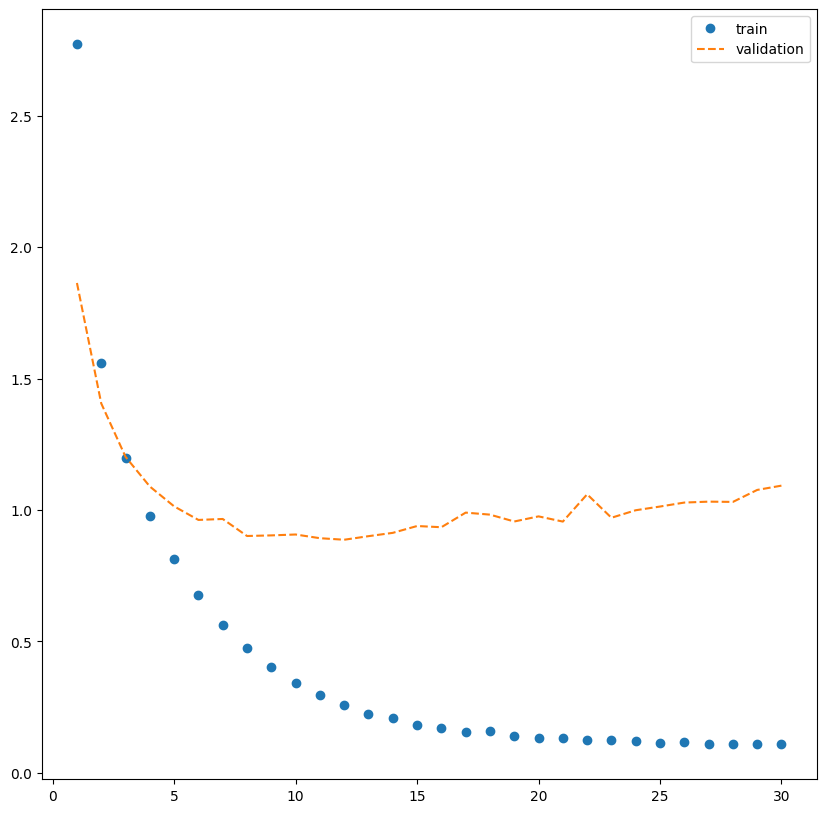

In [48]:
import matplotlib.pyplot as plt

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']
val_accuracy = history_dict['val_accuracy']
epochs = range(1, len(loss)+1)
plt.figure(figsize=(10,10))
plt.plot(epochs, loss, 'o', label='train')
plt.plot(epochs, val_loss, '--', label='validation')
plt.legend()
plt.show()

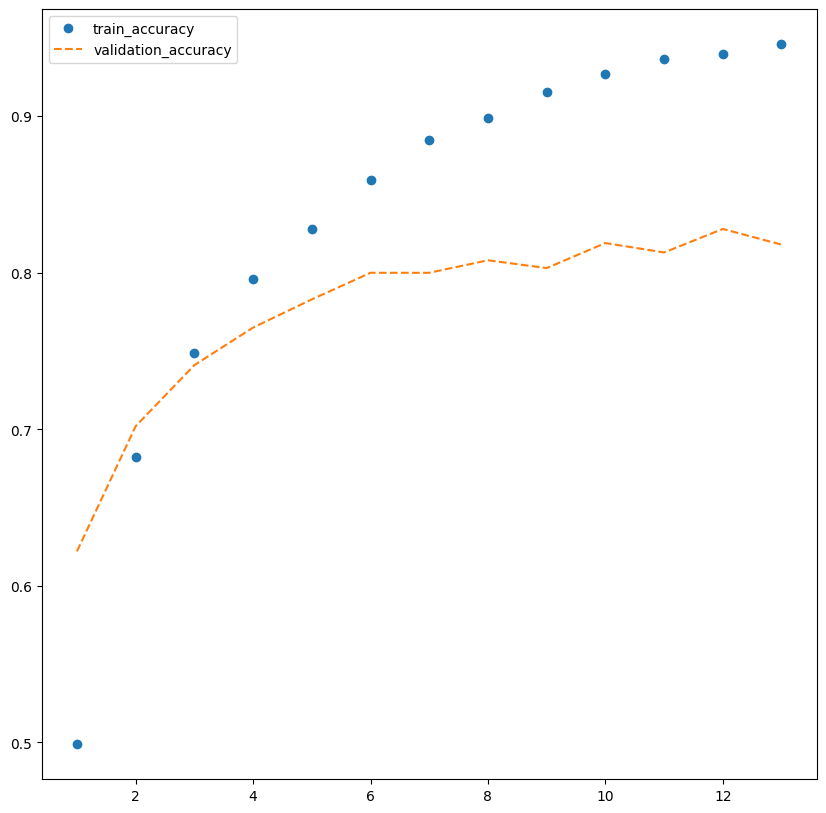

In [57]:
history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']
val_accuracy = history_dict['val_accuracy']
accuracy = history_dict['accuracy']
epochs = range(1, len(loss)+1)
plt.figure(figsize=(10,10))
plt.plot(epochs, accuracy, 'o', label='train_accuracy')
plt.plot(epochs, val_accuracy, '--', label='validation_accuracy')
plt.legend()
plt.show()

In [58]:
model.evaluate(X_test,y_test)

71/71 [==============================] - 0s 4ms/step - loss: 0.9584 - accuracy: 0.7898


[0.9583643674850464, 0.7898486256599426]

In [59]:
predictions = model.predict(X_test)

71/71 [==============================] - 0s 3ms/step


In [60]:
predictions[0]

array([2.1602671e-06, 2.9657322e-05, 6.3205116e-06, 9.4211245e-01,
       5.5129535e-02, 9.4339708e-07, 2.7656943e-06, 7.6980422e-07,
       2.2052623e-04, 4.3674108e-06, 3.5675436e-07, 1.5052830e-04,
       4.5405568e-06, 5.2422174e-04, 2.8207210e-06, 4.0603591e-06,
       9.6292415e-04, 2.2720362e-06, 4.8506172e-06, 1.3105832e-04,
       1.5115133e-04, 1.5044937e-04, 2.7287467e-07, 1.4765885e-05,
       2.5338200e-06, 6.4439496e-06, 1.2650779e-06, 2.5097936e-05,
       5.0347893e-08, 4.9435777e-05, 1.9990342e-05, 1.1493664e-05,
       2.2528473e-05, 4.1355514e-05, 1.0408605e-05, 2.2794747e-07,
       1.9092664e-05, 7.2412176e-06, 6.5420909e-07, 1.5317521e-04,
       1.0846262e-06, 8.4715266e-06, 1.8389406e-06, 6.7380279e-07,
       2.8189249e-06, 3.4911989e-07], dtype=float32)

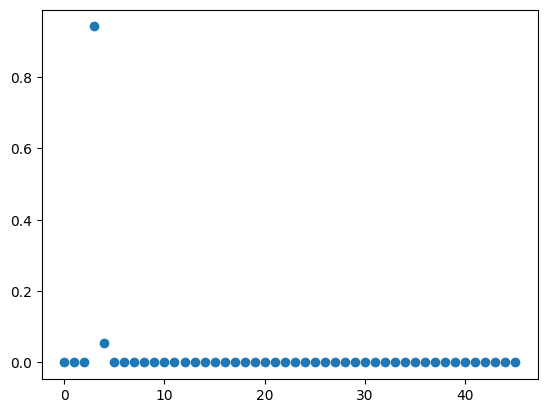

In [66]:
plt.scatter(np.arange(len(predictions[0])),predictions[0])

In [61]:
np.sum(predictions[0])

0.99999994

In [62]:
np.argmax(predictions[0])

3